## Scientific Computing 2021: Homework Assignment 2 
Due Monday October 18, 2021 (23:59)

### Problem 1 (2 points)
Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$. 
* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.
* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get 

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

If $\|\cdot\|$ is the $l^2$-norm and $A_q$ is arbitrary, then $$\kappa(A_q)=\sqrt{\frac{\lambda_{\max}(A_q^*A_q)}{\lambda_{\min}(A_q^*A_q)}}$$

$$A_q^* A_q = \left(\begin{matrix}1 & q\\ q & 1 + q^2\end{matrix}\right)$$

Eigenvals:
$$\begin{vmatrix} 1 - \lambda & q \\ q & 1 + q^2 - \lambda \end{vmatrix} = \lambda^2 - \lambda(q^2 + 2) + 1 = 0$$

$$\lambda_{1, 2} = \frac{\pm q\sqrt{q^2 + 4} + q^2 + 2}{2} \in \mathbb R$$

$$\kappa(A_q) = \sqrt{\frac{\lambda_\max}{\lambda_\min}} = \sqrt{\frac{|q|\sqrt{q^2 + 4} + q^2 + 2}{-|q|\sqrt{q^2 + 4} + q^2 + 2}} = \frac{|q|\sqrt{q^2 + 4} + q^2 + 2}{\sqrt{(q^2 + 2)^2 - q^2(q^2 + 4)}} = \frac{|q|\sqrt{q^2 + 4} + q^2 + 2}{2}$$

$$\left(\begin{matrix}1 & q \\ 0 & 1\end{matrix}\right) \left(\begin{matrix}x_1 \\ x_2 \end{matrix}\right) = \left(\begin{matrix}b_1 \\ b_2 \end{matrix}\right)$$

$$\left\{\begin{eqnarray} x_1 + q\,x_2 & = & b_1 \\ x_2 & = & b_2 \end{eqnarray}\right.$$

$$\left\{\begin{eqnarray} x_1 & = & b_1 - q\,b_2 \\ x_2 & = & b_2 \end{eqnarray}\right.$$

In [272]:
import numpy as np

In [273]:
# Example.
def cond(q):
    return (np.abs(q) * np.sqrt(q**2 + 4) + q**2 + 2) / 2


cond(1e6)

1000000000002.0

In [274]:
import numpy.linalg as LA


def solve(q, b):
    A = np.array([[1, q], [0, 1]], dtype=float)
    return LA.solve(A, b)

In [275]:
# Find the values of q, db and b by the selection method
# based on the hypothesis that b[0] / b[1] should be proportional to q.
someValue = 10
db = np.array([10, 0])
for q in 10**np.arange(1, 9):
    b = np.array([someValue * q, someValue])
    x = solve(q, b)
    dx = solve(q, b + db) - x
    print(
        LA.norm(dx) / LA.norm(x), 1e6 * LA.norm(db) / LA.norm(b),
        LA.norm(dx) / LA.norm(x) >= 1e6 * LA.norm(db) / LA.norm(b),
        q, db, b
    )

1.0 99503.71902099892 False 10 [10  0] [100  10]
1.0 9999.500037496875 False 100 [10  0] [1000   10]
1.0 999.9995000003751 False 1000 [10  0] [10000    10]
1.0 99.9999995 False 10000 [10  0] [100000     10]
1.0 9.9999999995 False 100000 [10  0] [1000000      10]
1.0 0.9999999999995001 True 1000000 [10  0] [10000000       10]
1.0 0.09999999999999949 True 10000000 [10  0] [100000000        10]
1.0 0.009999999999999998 True 100000000 [10  0] [1000000000         10]


Thus, the values of $q, \Delta b$ and $b$, at which the inequality is satisfied, are:
$$q = 10^6,$$
$$\Delta b = [10, 0],$$
$$b = [10^7, 10]$$

### Problem 2 (2 points)
* Write a program to compute an approximate value for the derivative of a function using the finite-difference formula 

  $$f'(x)\approx \frac{f(x+h)-f(x)}{h}.$$

  Test your program using the function $\tan(x)$ at $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of $h$, for $h=10^{-k}, k=0,\ldots,16$. You should use log scale for $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.
* Repeat the exercise using the centered difference approximation

 $$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

 What is now different and why?

In [142]:
def forwardDiff(f, x, h):
    return (f(x + h) - f(x)) / h


def centralDiff(f, x, h):
    return (f(x + h) - f(x - h)) / 2 / h


def analytic(x):
    return np.cos(x)**-2

In [156]:
import matplotlib.pyplot as plt

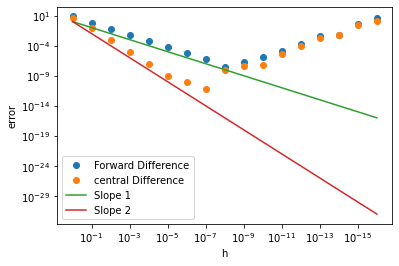

In [178]:
f = np.tan
x = 1.
h = 10**(-np.arange(17.))
forwardErr = np.abs(forwardDiff(f, x, h) - analytic(x))
centralErr = np.abs(centralDiff(f, x, h) - analytic(x))
plt.loglog(h, forwardErr, 'o', label='Forward Difference')
plt.loglog(h, centralErr, 'o', label='central Difference')
plt.xlabel('h')
plt.ylabel('error')

plt.plot(h, h, label='Slope 1')
plt.plot(h, h**2, label='Slope 2')
plt.gca().invert_xaxis()
plt.legend();

Forward difference method has first order of accuracy, decreasing as $O(h)$ until it reaches its minimum at $h \sim 10^{-8},$ $error \sim 10^{-9}$. Then the error starts increasing due to rounding errors contribution.
Similar result is achieved in case of central difference method but it has second order of accuracy and is decreasing as $O(h^2),$ reaching its minimum at $h \sim 10^{-7},$ $error \sim 10^{-10}$.

### Problem 3 (2 points)
* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (`Xtrain`, `Ytrain`) and the input part of test data (`Xtest`), and output a prediction for test data (`Ypred`). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., `scikit-learn`). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.
* Test your algorithm on real data from UCI repository:
  * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
  * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
  
  Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error as the measure of accuracy.
  Compare your results with results of some linear models implemented in standard predictive modeling software    (e.g., `Ridge` and `LinearRegression` from `scikit-learn`).

In [290]:
from urllib.request import urlretrieve
import zipfile

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00206/slice_localization_data.zip'
urlretrieve(url, 'CTslices')
# Uncomment for the second dataset.
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv'
# urlretrieve(url, 'CASP.csv')
print('downloaded OK')

zip_ref = zipfile.ZipFile('CTslices', 'r')
zip_ref.extractall('CTslices_dir')
zip_ref.close()
print('extracted OK')

downloaded OK
extracted OK


In [295]:
data = np.loadtxt('CTslices_dir/slice_localization_data.csv', skiprows=1, delimiter=',')
# data = np.loadtxt('CASP.csv', skiprows=1, delimiter=',')
print('Total rows:', data.shape[0])
print('Total columns:', data.shape[1])

N = len(data)
X = data[:, :-1]  # input values
X[:, 0] = 1  # remove the ID column, insert constants instead
y = data[:, -1] # output values

Total rows: 53500
Total columns: 386


In [310]:
N_train = 300
inds = np.random.permutation(N)

train = inds[:N_train]
test = inds[N_train:]
X_train = X[train]
y_train = y[train]
X_test = X[test]
y_test = y[test]

Q = X_train.T @ X_train
N_features = X_train.shape[1]

In [311]:
def rrmse(y_test, y_pred):
    return LA.norm(y_test - y_pred) / LA.norm(y_test - np.mean(y_test))


def gridSearch(muRange):
    bestErr = 1e6
    bestMu = None
    errors = np.zeros(len(muRange))
    for i in range(len(muRange)):
        mu = muRange[i]
        coeffs =\
            LA.inv(X_train.T @ X_train + np.diag([mu] * N_features)) @\
            X_train.T @ y_train

        y_pred = X_test @ coeffs
        errors[i] = rrmse(y_test, y_pred)
        if errors[i] < bestErr:
            bestErr = errors[i]
            bestMu = mu
    
    return bestMu, bestErr, errors

In [312]:
# mu = [1e-8, 1e-7, ... 1, 10].
muRange = 10**np.arange(-12., 6.)
mu, bestErr, errors = gridSearch(muRange)

In [313]:
mu, bestErr

(10.0, 0.46875561955181183)

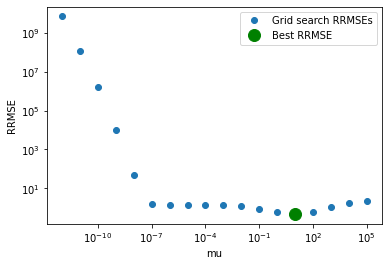

In [314]:
plt.loglog(muRange, errors, 'o', label='Grid search RRMSEs')
plt.plot(mu, bestErr, 'go', ms=12, label='Best RRMSE')
plt.xlabel('mu')
plt.ylabel('RRMSE')
plt.legend();

In [315]:
# Now compare with scikit.
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as LR

model = Ridge()
model.fit(X_train, y_train)
y_pred_ridge = model.predict(X_test)
print('RRMSE for Ridge model:', rrmse(y_test, y_pred_ridge))

model = LR()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
print('RRMSE for LR model:', rrmse(y_test, y_pred_lr))

RRMSE for Ridge model: 0.5720566081306969
RRMSE for LR model: 1.3731590120793655


### Problem 4 (2 points)
Suppose that we use the Leapfrog algorithm with some $\Delta t$ to simulate the dynamics of the harmonic oscillator (https://en.wikipedia.org/wiki/Harmonic_oscillator) with positive mass $m$ and force constant $k$ (in other words, with the energy function $H=\frac{m\dot x^2}{2}+\frac{kx^2}{2}$). Assuming a perfect implementation of Leapfrog, at which combinations of $\Delta t, m, k$ will the simulation diverge as $n\to\infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$?

$$\frac{d}{dt}{x\choose v}={v\choose -\frac{k}{m}x}$$

For $n = 1, 2, ...$
$${x_{n + 1} \choose v_{n + \frac{3}{2}}} = \left(\begin{matrix}1 - \frac{k}{m} \Delta t^2 & \Delta t^2\\ -\frac{k}{m} \Delta t & 1\end{matrix}\right) {x_n \choose v_{n + \frac{1}{2}}}$$

Let $$A = \left(\begin{matrix}1 - \frac{k}{m} \Delta t^2 & \Delta t^2\\ -\frac{k}{m} \Delta t & 1\end{matrix}\right)$$

We can notice a recurrent pattern here.
$${x_{n + 1} \choose v_{n + \frac{3}{2}}} = A {x_n \choose v_{n + \frac{1}{2}}} = A\,A {x_{n - 1} \choose v_{n - \frac{1}{2}}} = \textrm{... so on} = A^{n} {x_{0} \choose v_{\frac{1}{2}}}$$

We can represent ${x_{0} \choose v_{\frac{1}{2}}} = c_1 u_1 + c_2 u_2$, where $u_1$, $u_2$ - eigenvectors of $A$ corresponding to its different eigenvalues.

Furthermore:

$$A^{n} {x_{0} \choose v_{\frac{1}{2}}} = c_1 A^{n} u_1 + c_2 A^{n} u_2 = c_1 \lambda^{n} u_1 + c_2 \lambda^{n} u_2$$

Since we are interested in the value of $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)$, we can consider the norm $\|{x_{n + 1} \choose v_{n + \frac{3}{2}}}\|$, which is proportional to the eigenvalues of $A$ ($\lambda_1$ and $\lambda_2$) due to the written above. Eigenvalues have the power of $n$ in the expression so if their module is greater than 1, it is already enough for the algorithm to diverge. So let us consider the eigenvalues of $A$.

$$\textrm{det}\left(\begin{matrix}1 - \frac{k}{m} \Delta t^2 - \lambda & \Delta t^2\\ -\frac{k}{m} \Delta t & 1 - \lambda \end{matrix}\right) = (1 - \frac{k}{m} \Delta t^2 - \lambda)(1 - \lambda) = 0$$

$$\textrm{Let } p = \frac{k}{m} \Delta t^2$$

$$\lambda_{1, 2} = \frac{2 - p \pm \sqrt{p(p - 4)}}{2}$$

For both possible lambdas it is obvious that if $p > 4$, then $|\lambda| > 1$. So, the values of $\Delta t$, $m$ and $k$ must satisfy the condition $\frac{k}{m} \Delta t^2 \ge 4$ for the algorithm to diverge.

### Problem 5 (2 points)
Consider the velocity Verlet method for solving the equation $\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$: 

\begin{align}
\tilde v_{n+1/2} &= \tilde v_{n}+\frac{1}{2}f_1(\tilde x_n)\Delta t\\
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1} &= \tilde v_{n+1/2}+\frac{1}{2}f_1(\tilde x_{n+1})\Delta t
\end{align}
Find its global convergence order and verify it experimentally.

To obtain the local error on the next step, let us compute the Taylor expansions at time $t$ of the position $x(t\pm \Delta t)$ in different time directions:

$$x(t + \Delta t) = x(t) + v(t)\Delta t + \frac{a(t)\Delta t^2}{2} + \frac{b(t)\Delta t^3}{6} + O(\Delta t^4)$$

$$x(t - \Delta t) = x(t) - v(t)\Delta t + \frac{a(t)\Delta t^2}{2} - \frac{b(t)\Delta t^3}{6} + O(\Delta t^4),$$

where $x$ is the position, $v$ - the velocity, $a$ - the acceleration and $b$ - the jerk.

Adding this two expansions gives:

$$x(t + \Delta t) = 2x(t) - x(t - \Delta t) + a(t)\Delta t^2 + O(\Delta t^4)$$

Hence, the local error in position is $O(\Delta t^4)$. To obtain the global error:

$$\textrm{error}(x(t_0 + \Delta t)) = O(\Delta t^4)$$
$$x(t_0 + 2\Delta t) = 2x(t_0 + \Delta t) - x(t_0) + a(t_0 + \Delta t)\Delta t^2 + O(\Delta t^4)$$
$$\textrm{error}(x(t_0 + 2\Delta t)) = 2\textrm{error}(x(t_0 + \Delta t)) + O(\Delta t^4) = 3\,O(\Delta t^4)$$

Similarly,

$$\textrm{error}(x(t_0 + 3\Delta t)) = 6\,O(\Delta t^4)$$
$$\textrm{error}(x(t_0 + 4\Delta t)) = 10\,O(\Delta t^4)$$
$$\textrm{error}(x(t_0 + 5\Delta t)) = 15\,O(\Delta t^4)$$

It can be shown by induction that:

$$\textrm{error}(x(t_0 + n\Delta t)) = \frac{n(n + 1)}{2}\,O(\Delta t^4)$$

If we consider the global error in $x$ between $x(t_0)$ and $x(t + T)$, where $T = n\Delta t$:

$$\textrm{error}(x(t_0 + T)) = \left(\frac{T^2}{2\Delta t^2} + \frac{T}{2\Delta t}\right)O(\Delta t^4) = O(\Delta t^2)$$

Therefore, the global error in position has $2^{\textrm{nd}}$ order. The error in the velocity $v$ has $2^{\textrm{nd}}$ order too because it is determined from the positions $x$. Let us prove it experimentally.

In [316]:
def f1(x):
    return -np.sin(x)

def Verlet(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0] # at integer times
    vHistory = [v0] # at integer times
    vHistory_ = []  # at half-integer times
    tHistory = [0]
    for n in range(N):
        vHistory_.append(vHistory[-1]+0.5*dt*f1(xHistory[-1]))
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory.append(vHistory_[-1]+0.5*dt*f1(xHistory[-1]))
        tHistory.append(dt*(n+1))
    # define vHistory for integer times
    #vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)
    return xHistory, vHistory, tHistory

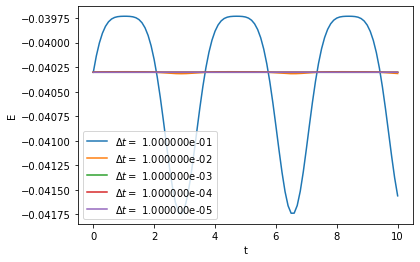

In [319]:
def E(X):
    return X[1]*X[1]/2-np.cos(X[0])

nHistory = []
errorE = []
for m in range(1,6):
    dt = 10**(-m)
    N = int(10. / dt)
    xHistory, vHistory, tHistory = Verlet(f1, 1., 1., dt=dt, N=N) 
    Ehistory = [E([xHistory[n], vHistory[n]]) for n in range(len(xHistory))]
    nHistory.append(N)
    errorE.append((np.abs(Ehistory[-1]-Ehistory[0])))
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ %e' %dt)
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()

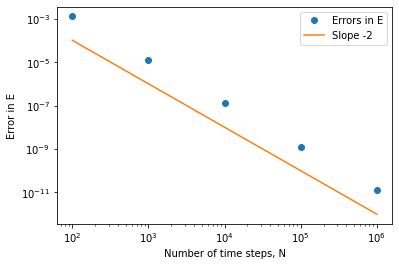

In [324]:
nHistory = np.array(nHistory, dtype=float)
plt.loglog(nHistory, errorE, 'o', label='Errors in E')
plt.plot(nHistory, nHistory**(-2), label='Slope -2')
plt.xlabel('Number of time steps, N')
plt.ylabel('Error in E')
plt.legend();

We see that error in E is decreasing with slope -2 on logarithmic scale which means we proved our method to have second order of accuracy.